#  <span style="color:Purple">****Glass Identification****

# Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



The chemical compositions are measured as the weight percent in corresponding oxide.             
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)                      
•	1- building_windows_float_processed                    
•	2- building_windows_non_float_processed                  
•	3- vehicle_windows_float_processed                         
•	4- vehicle_windows_non_float_processed (none in this database)                       
•	5- containers                 
•	6- tableware                         
•	7- headlamps                            
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7).  

Predict : Type of glass                      

Dataset Link-
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv                          
•	https://github.com/dsrscientist/dataset3


<span style="color:red">****As from the problem statement , we get to know that we have to predict Type of glass, Hence it is Classification problem.
We apply classification algorithm to train , test and predict ****

# Python Implementation-

# <span style="color:Purple">****Importing Necessary Libraries****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


<span style="color:blue">Observation-It does not have Column name ,So we add column name to each column.

In [3]:
# Naming the column
columns_name = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_of_Glass']
df.columns = columns_name
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
print(f'The rows and columns in the dataset:{df.shape}')
print(f'\n The columns in the dataset:{df.columns}')

The rows and columns in the dataset:(214, 11)

 The columns in the dataset:Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_Glass'],
      dtype='object')


In [5]:
# getting all information of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_Glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


<span style="color:BLUE">Observation -There are two data types present in  dataset:(float64,int64)                   
 <span style="color:blue">    - No null values are present in any column.

# <span style="color:purple">Checking Duplicate values

In [6]:
#Checking Duplicate values in DataFrame
print("Total Dublicate rows are:",df.duplicated().sum())

Total Dublicate rows are: 0


In [7]:
#setting Id as Index
df.set_index("Id",inplace =True)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_Glass
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
#checking number of unique values in each column 
df.nunique().to_frame("No of unique values")

,No of unique values
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type_of_Glass,6


In [9]:
#Checking the valuecount(i.e frequency of each value ) of each column 
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64


8.03    5
8.43    5
9.57    4
8.79    

<span style="color:blue">Observation-It does not have any blank space ,hence looks good. 

<span style="color:red">****As suggested in the problem discription, converting the labels into only two variables. 
Reference text (The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). )****

In [10]:
#  For " non-window glass (classes 5-7)" label variable
df.loc[df.Type_of_Glass >= 5, 'Type_of_Glass'] = 1
#  For " window glass (classes 1-4)" label variable
df.loc[df.Type_of_Glass >1, 'Type_of_Glass'] = 0
#number of "window glass" and "non-window glass"quality of wine
df.Type_of_Glass.value_counts()

1    121
0     93
Name: Type_of_Glass, dtype: int64

<span style="color:blue">Observation-Data is not Imbalanced ,hence looks good. 

# <span style="color:Purple">Description of Dataset

In [11]:
#Statistical summary of numerical column
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.565421
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.496864
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,1.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,1.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


<span style="color:blue">10) From the above description , we can observe the following things:                 
    .)No missing values are present in dataset because no.of observation is same in all column.            
    .) The mean value is greater than median(50%) in "Al", "Ca","Ba" which means data is skewed right in these.      
    .)The mean value is smaller than median(50%) in  "Mg","K",which means data is skewed left in these               
    .)There is difference in 75% and max value in "Na","Al","K","Ca","Ba". Hence it means Outliers are present in the dataset. 

# <span style="color:purple">Data Visualization

<span style="color:green">****Univariate Analysis****

1    121
0     93
Name: Type_of_Glass, dtype: int64


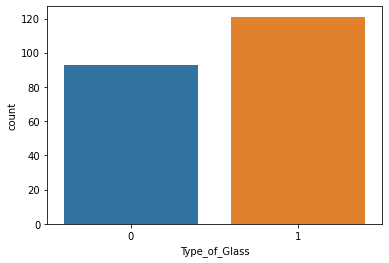

In [12]:
#Visualise the "Type_of_Glass" 
ax=sns.countplot(x="Type_of_Glass",data =df)
print(df["Type_of_Glass"].value_counts())

<span style="color:blue">Observation-Most of the glass belongs to non-window glass

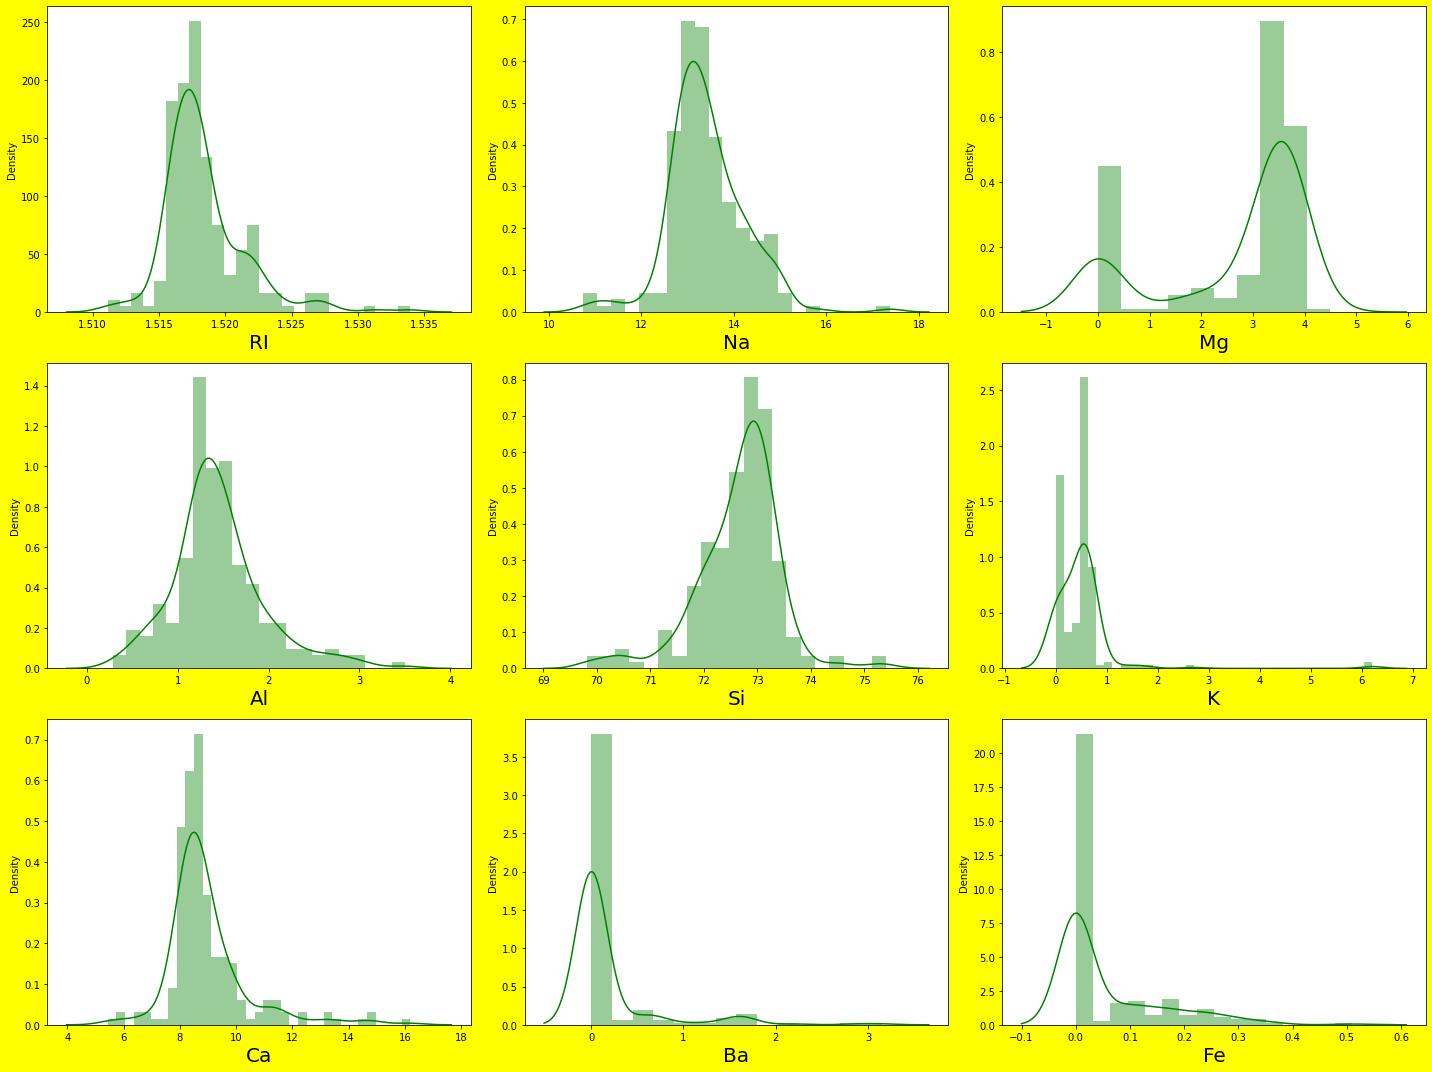

In [13]:
#Checking for data distribution in features only
plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <=9: #here 9 is the number of  features
        ax = plt.subplot (3,3,plotnumber)
        sns.distplot (df [column],color='g')
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

<span style="color:blue">Observation-From data distribution, it seems that data is not normally distributed ,all feature has atleast some skewness.

<span style="color:green">****Bivariate Analysis****

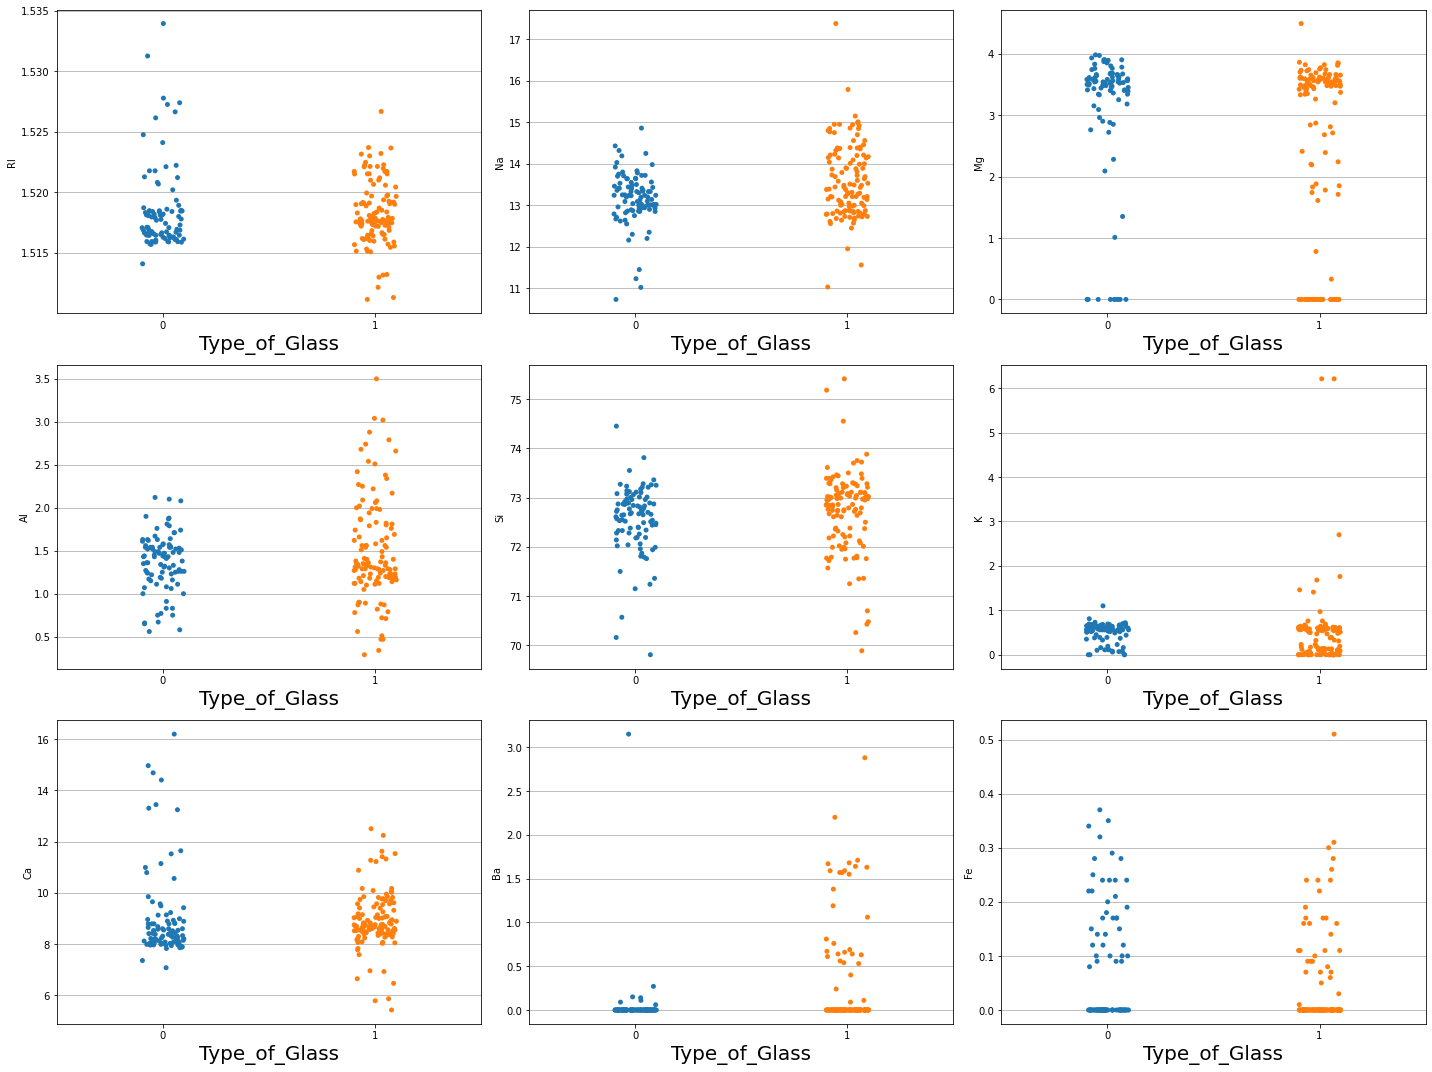

In [14]:
#Checking relationship of features with target only
plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <=9: #here 9 is the number of  features
        ax = plt.subplot (3,3,plotnumber)
        sns.stripplot (x="Type_of_Glass",y=df[column],data=df)
        plt.xlabel ("Type_of_Glass", fontsize =20) 
        plt.grid(axis ='y')
    plotnumber +=1
plt.tight_layout()

<span style="color:blue">Observation-                     
Plot1-"RI" of Window glass(i.e 0) is higher than non Window glass.         
Plot-2 Amount of "Na" is silghtly higher in non Window glass.           
Plot 3- No significant relation.                 
Plot 4-Amount of "Al" is  higher in non Window glass.                 
Plot 5- No significant relation.                                              
Plot 6- "K" is  higher in non Window glass.               
Plot 7-Amount of "Ca" is  higher in Window glass.                 
Plot 8-Amount of "Ba" is  higher in non Window glass.                                   
Plot 9-Amount of "Fe" is  higher in  Window glass.

<span style="color:green">****Multivariate Analysis****

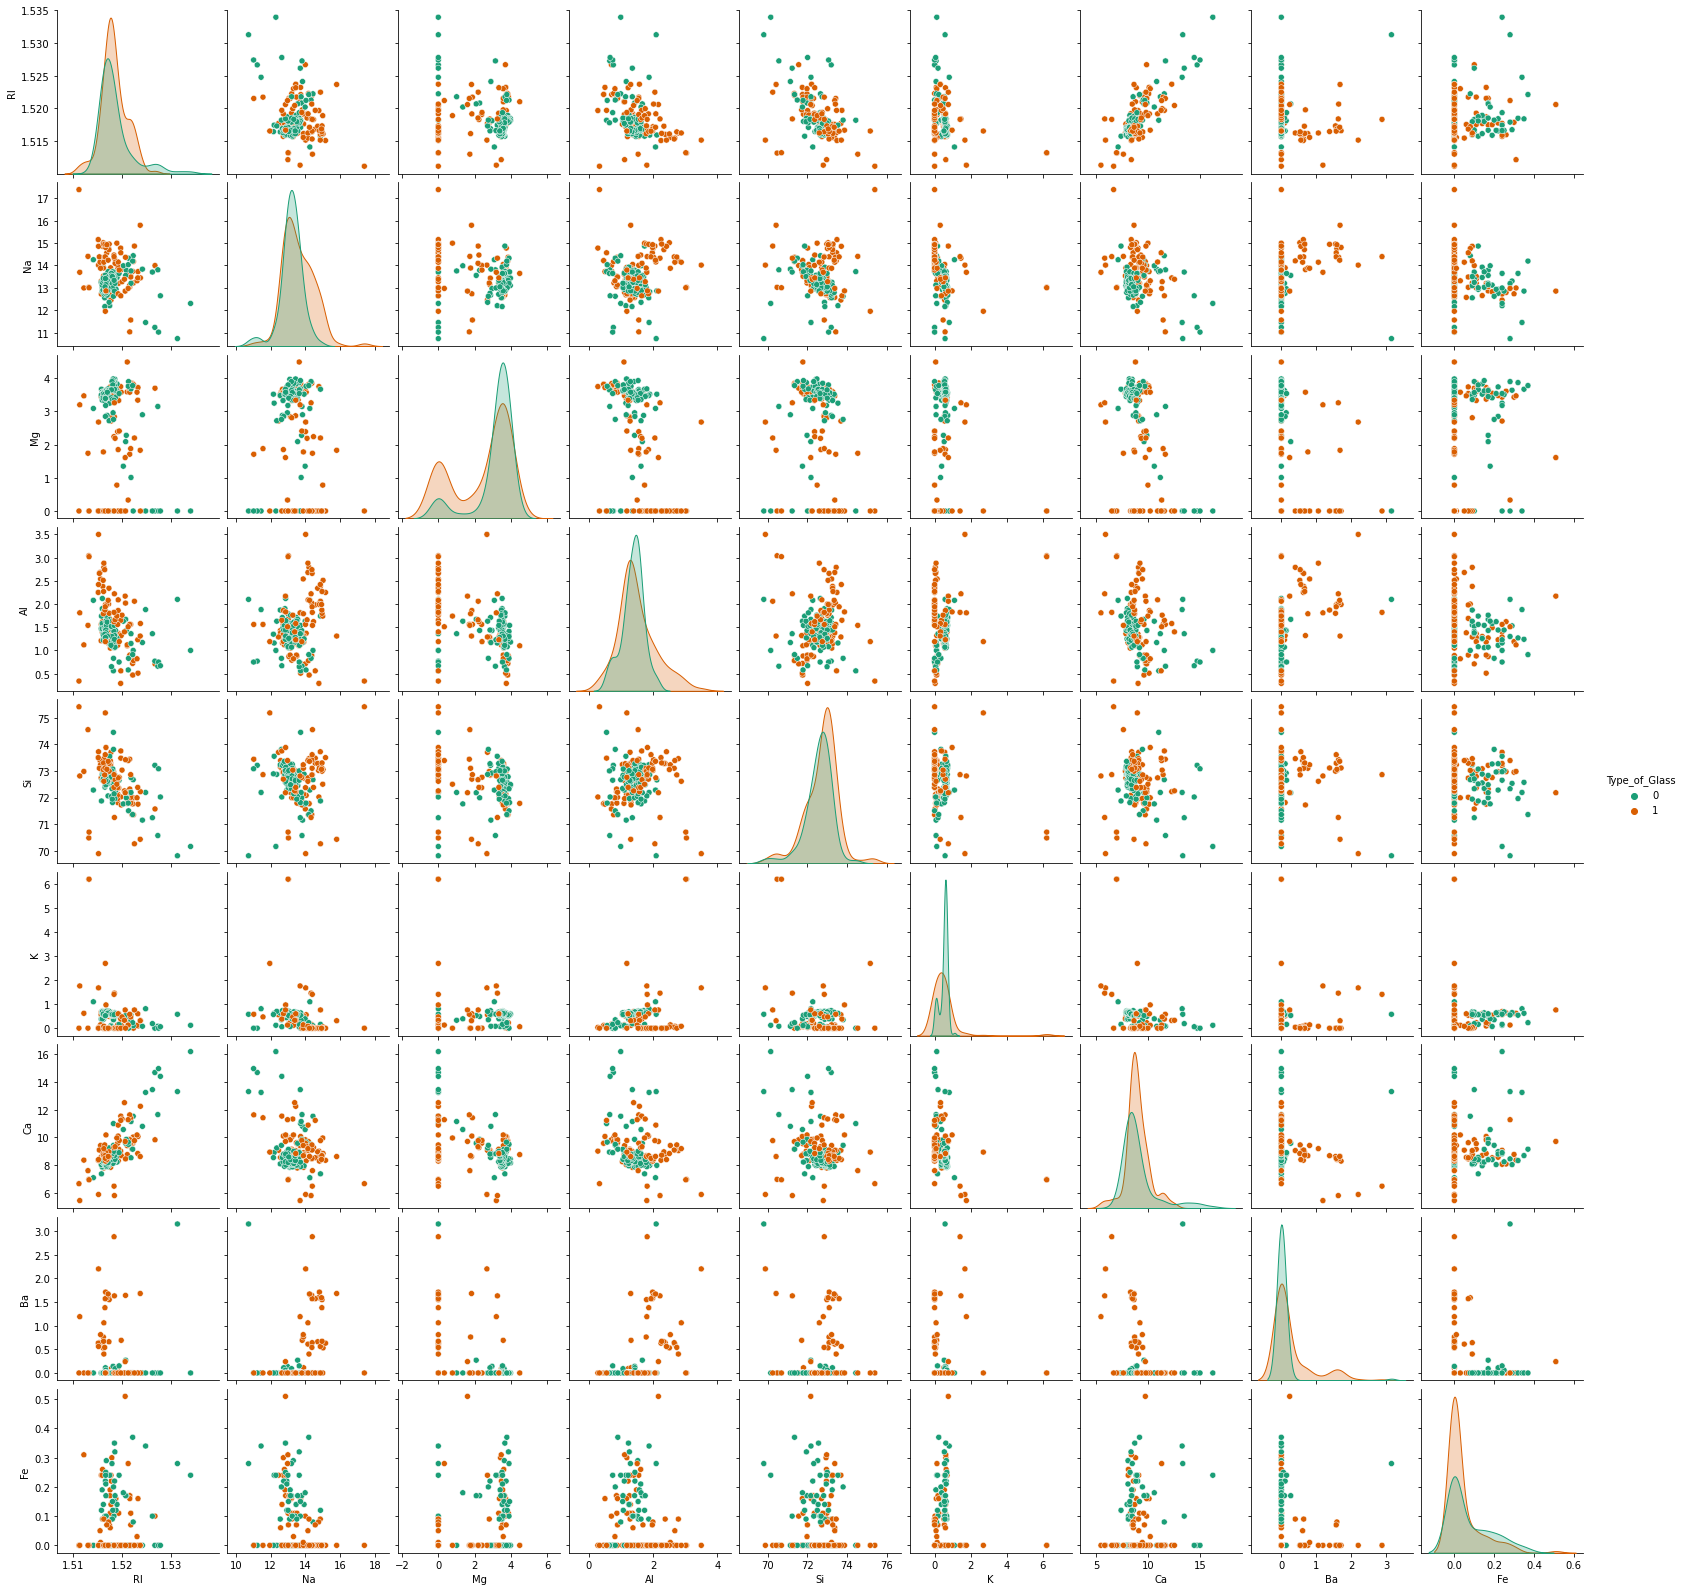

In [15]:
#checking churn level and Multiplelines
sns.pairplot( df, hue= "Type_of_Glass",palette= "Dark2")
plt.show()

# <span style="color:Purple">****Checking for outliers****

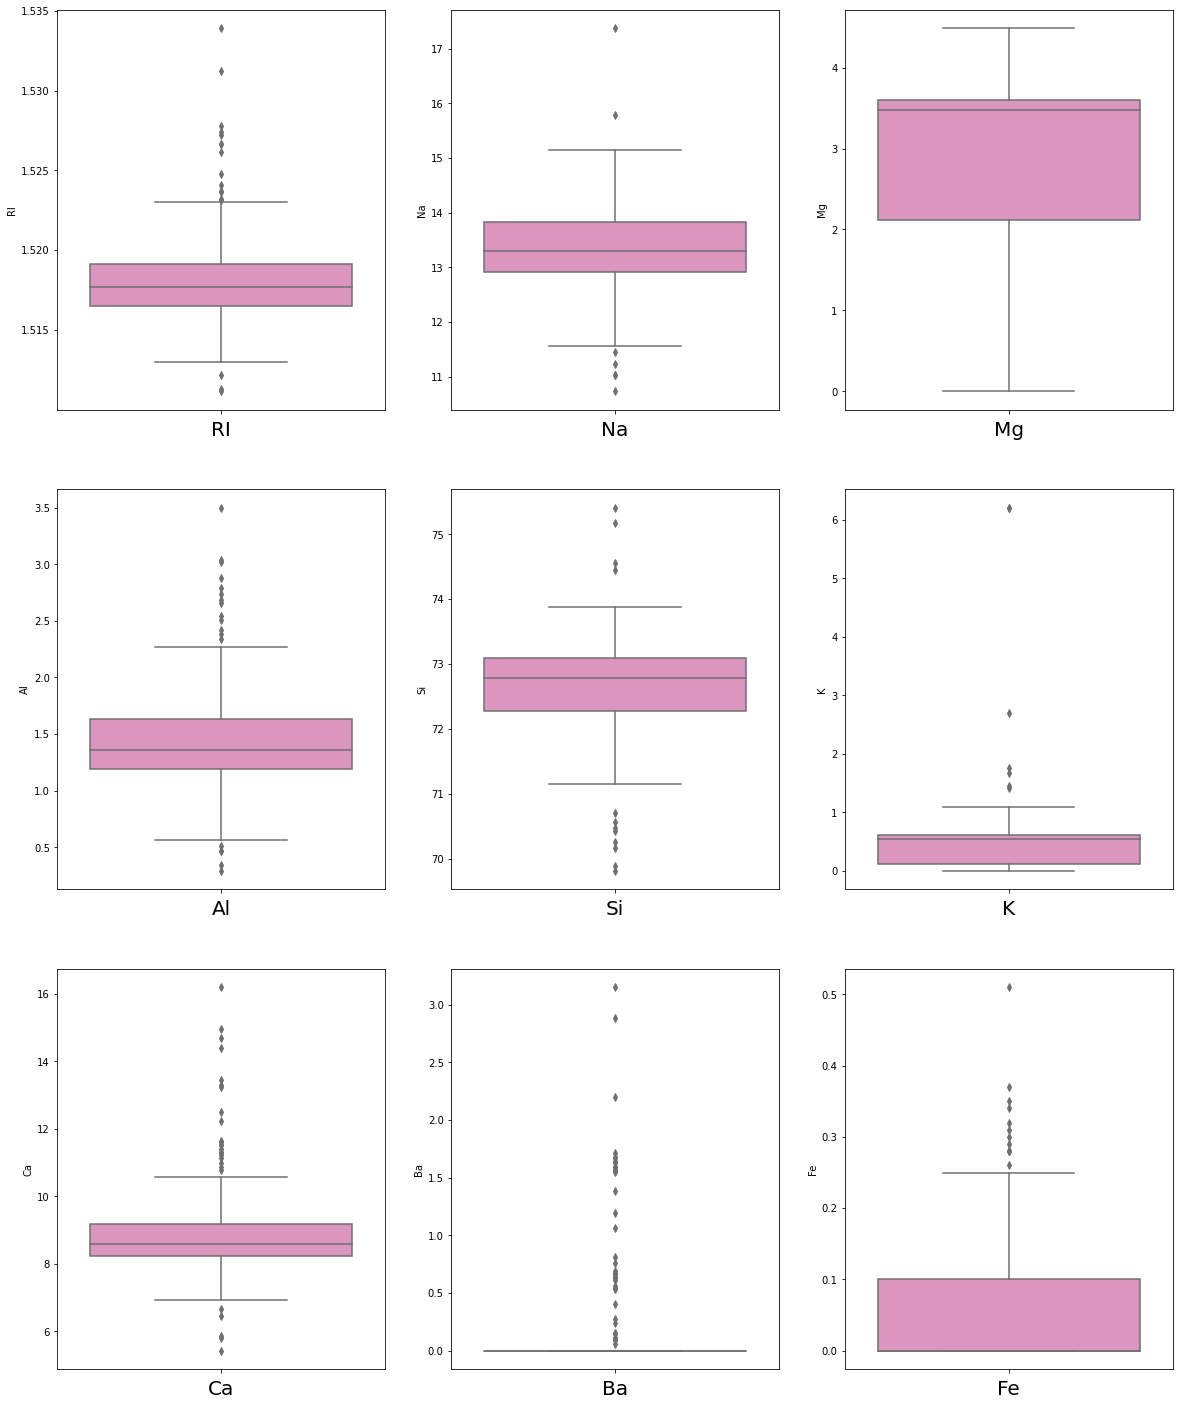

In [16]:
#checking outliers by using Boxplot
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=9:
        plt.subplot(3,3,p)
        sns.boxplot(y=df[i], palette="Set2_r")
        plt.xlabel(i,fontsize =20)
    p+=1
plt.show()

<span style="color:blue">Observation- Almost all Features has Outliers.Lets remove Outliers by IQR method or Z-score method.

<span style="color:red">1st Method: Z score

In [17]:
from scipy.stats import zscore
outliers_feature=df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
z=np.abs(zscore(outliers_feature)) #.abs() to remove negative values
z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Id,,,,,,,,,
1,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451
2,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451
3,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451
4,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451
5,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451
...,...,...,...,...,...,...,...,...,...
210,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451
211,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451
212,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451


In [18]:
#Z-score>3
np.where(z>3)# It is estimated in Normal Distribution that 99.7% of the data points lie between +/- 3 standard deviation

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [19]:
#now removing the data above zscore and creating a new dataframe
df1=df[(z<3).all(axis=1)]
print("New Dataframe having rows and column: " ,df1.shape)
print("New Dataframe column's name: " ,df1.columns)


New Dataframe having rows and column:  (194, 10)
New Dataframe column's name:  Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_Glass'], dtype='object')


In [20]:
#shape of old and new dataframe
print("OLd Dataframe : " ,df.shape[0])
print("New Dataframe : " ,df1.shape[0])
print("Data Loss Percentage with Z-score method:",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

OLd Dataframe :  214
New Dataframe :  194
Data Loss Percentage with Z-score method: 9.345794392523365


<span style="color:red">2nd Method: IQR (Inter Quantile Method)

In [21]:
#1st Quantile
q1=outliers_feature.quantile(0.25)

#3rd Quantile
q3=outliers_feature.quantile(0.75)

#calculating IQR
iqr=q3-q1

df2=df[~((df < (q1 - 1.5*iqr ))|(df > (q3 + 1.5*iqr ))).any(axis=1)]

In [22]:
print("New Dataframe after IQR : " ,df2.shape)
print("Data Loss Percentage  with IQR method :",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

New Dataframe after IQR :  (136, 10)
Data Loss Percentage  with IQR method : 36.44859813084112


<span style="color:Blue">Conclusion -Data Loss Percentage  with IQR method is very high as compared with Z-score . So i go with z-score 

In [23]:
#Storing Dataframe with Z-score method in old dataframe
df=df1

In [24]:
#reset the index after removing outliers values
df.reset_index(drop=True,inplace=True)

# <span style="color:purple">****Removing Skewness****

In [25]:
df.skew() 

RI               0.952733
Na               0.371482
Mg              -1.528849
Al               0.658259
Si              -0.425450
K                0.303175
Ca               1.077962
Ba               3.188587
Fe               1.486479
Type_of_Glass   -0.272594
dtype: float64

<span style="color:BLUE">Skewness can be removed by following methods- log, square root,cube root or inverse transformation.

In [26]:
#Removing Skewness using cuberoot and expoential method
df["RI"]=np.cbrt(df["RI"])
df["Mg"]=np.exp(df["Mg"])
df["Ca"]=np.cbrt(df["Ca"])
df["Ba"]=np.cbrt(df["Ba"])
df["Fe"]=np.cbrt(df["Fe"])
#checking Skewness again
df.skew()

RI               0.948045
Na               0.371482
Mg              -0.385514
Al               0.658259
Si              -0.425450
K                0.303175
Ca               0.611914
Ba               2.207594
Fe               0.883166
Type_of_Glass   -0.272594
dtype: float64

In [27]:
#Removing Skewness using sqrt method
df["Ba"]=np.sqrt(df["Ba"])
#checking Skewness again
df.skew()

RI               0.948045
Na               0.371482
Mg              -0.385514
Al               0.658259
Si              -0.425450
K                0.303175
Ca               0.611914
Ba               1.979711
Fe               0.883166
Type_of_Glass   -0.272594
dtype: float64

In [28]:
#checking Correlation 
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_Glass
RI,1.000000,0.050624,0.102477,-0.522228,-0.608915,-0.368233,0.690642,-0.224943,0.016211,0.160205
Na,0.050624,1.000000,-0.335453,0.253127,-0.234718,-0.612183,0.017997,0.524892,-0.160878,0.189217
Mg,0.102477,-0.335453,1.000000,-0.574963,-0.414998,0.333103,-0.404083,-0.520812,0.085375,-0.258475
Al,-0.522228,0.253127,-0.574963,1.000000,0.335262,0.005827,-0.222137,0.589165,-0.083982,0.064619
Si,-0.608915,-0.234718,-0.414998,0.335262,1.000000,0.072579,-0.160134,0.184580,0.002445,0.104184
K,-0.368233,-0.612183,0.333103,0.005827,0.072579,1.000000,-0.526657,-0.288675,0.052307,-0.282659
Ca,0.690642,0.017997,-0.404083,-0.222137,-0.160134,-0.526657,1.000000,-0.135087,0.013133,0.214249
Ba,-0.224943,0.524892,-0.520812,0.589165,0.184580,-0.288675,-0.135087,1.000000,-0.005235,0.245468
Fe,0.016211,-0.160878,0.085375,-0.083982,0.002445,0.052307,0.013133,-0.005235,1.000000,-0.108519
Type_of_Glass,0.160205,0.189217,-0.258475,0.064619,0.104184,-0.282659,0.214249,0.245468,-0.108519,1.000000


<AxesSubplot:>

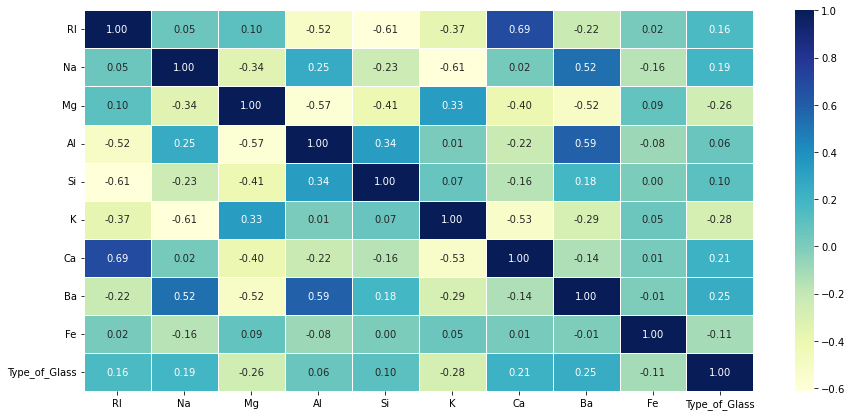

In [29]:
#checking the corelation  again using heatmaps (only absolute values)
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, fmt='.2f',cmap = "YlGnBu")

<span style="color:blue">Observation-                    
Mg,k,Fe has negative relation with Label.               
Al has very weak relation with Label and will drop further.            
There is no case of Multicolinearity.             

# <span style="color:Purple">****Seperating Feature and Label**** 

In [30]:
#Seperating Feature and label into x and y
x=df.drop(["Type_of_Glass","Al"],axis=1)
y=df["Type_of_Glass"]

# <span style="color:purple">****Feature Scaling Using Standard Scaler**** 

In [31]:
# data scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_scaled

,RI,Na,Mg,Si,K,Ca,Ba,Fe
0,1.292056,0.332127,3.945517,-1.612464,-1.319609,-0.041137,-0.429879,-0.67803
1,-0.197444,0.704398,0.555527,0.016082,0.172091,-1.038165,-0.429879,-0.67803
2,-0.824575,0.168328,0.440324,0.461790,-0.147559,-1.094542,-0.429879,-0.67803
3,-0.175524,-0.308179,0.777981,-0.189629,0.491741,-0.606457,-0.429879,-0.67803
4,-0.280746,-0.218834,0.603245,0.616073,0.420708,-0.770849,-0.429879,-0.67803
...,...,...,...,...,...,...,...,...
189,-0.728068,1.419158,-1.742079,0.221793,-1.532708,0.671549,2.233030,-0.67803
190,-0.802641,1.076668,-1.742079,-0.189629,-1.248575,0.400966,2.549838,-0.67803
191,-0.530695,2.238153,-1.742079,0.581788,-1.532708,-0.411806,2.758160,-0.67803
192,1.134449,1.404267,-1.742079,1.198921,-1.532708,-0.368929,2.774654,-0.67803


# <span style="color:Purple">****Split the data into training and testing sets****

In [32]:
# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split (x_scaled, y, test_size = .30, random_state = 48)
print("Total Size Of Feature in Dataset :",x_scaled.shape)
print("Total Size Of Training Feature Dataset : " ,x_train.shape)
print("Total Size Of Testing Feature Dataset : ", x_test.shape)

print("Total Size Of Label in Dataset :",y.shape)
print("Total Size Of Training Label Dataset : " ,y_train.shape)
print("Total Size Of Testing Label Dataset : ", y_test.shape)

Total Size Of Feature in Dataset : (194, 8)
Total Size Of Training Feature Dataset :  (135, 8)
Total Size Of Testing Feature Dataset :  (59, 8)
Total Size Of Label in Dataset : (194,)
Total Size Of Training Label Dataset :  (135,)
Total Size Of Testing Label Dataset :  (59,)


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(x_train, y_train)
# Predict the target variable for the train data
y_pred_train=logreg.predict(x_train)
# Predict the target variable for the test data
y_pred = logreg.predict(x_test) 


# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 0.725925925925926
Accuracy on test data: 0.7288135593220338
Confusion Matrix:
 [[18 10]
 [ 6 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.71      0.81      0.76        31

    accuracy                           0.73        59
   macro avg       0.73      0.72      0.72        59
weighted avg       0.73      0.73      0.73        59



# KNeighborsClassifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=knn.predict(x_train)
# Predict the target variable for the test data
y_pred = knn.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 0.7925925925925926
Accuracy on test data: 0.7966101694915254
Confusion Matrix:
 [[24  4]
 [ 8 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        28
           1       0.85      0.74      0.79        31

    accuracy                           0.80        59
   macro avg       0.80      0.80      0.80        59
weighted avg       0.80      0.80      0.80        59



# DecisionTreeClassifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=dtc.predict(x_train)
# Predict the target variable for the test data
y_pred = dtc.predict(x_test) 


# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 1.0
Accuracy on test data: 0.7966101694915254
Confusion Matrix:
 [[22  6]
 [ 6 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.81      0.81      0.81        31

    accuracy                           0.80        59
   macro avg       0.80      0.80      0.80        59
weighted avg       0.80      0.80      0.80        59



# SVM

In [36]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=svc.predict(x_train)
# Predict the target variable for the test data
y_pred = svc.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 0.8592592592592593
Accuracy on test data: 0.847457627118644
Confusion Matrix:
 [[25  3]
 [ 6 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.89      0.81      0.85        31

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59



# AdaBoostClassifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=ada.predict(x_train)
# Predict the target variable for the test data
y_pred = ada.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy on train data: 0.9851851851851852
Accuracy on test data: 0.7966101694915254
Confusion Matrix:
 [[23  5]
 [ 7 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        28
           1       0.83      0.77      0.80        31

    accuracy                           0.80        59
   macro avg       0.80      0.80      0.80        59
weighted avg       0.80      0.80      0.80        59



# RandomForestClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=RFC.predict(x_train)
# Predict the target variable for the test data
y_pred = RFC.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 1.0
Accuracy on test data: 0.847457627118644
Confusion Matrix:
 [[24  4]
 [ 5 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.87      0.84      0.85        31

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59



# GradientBoostingClassifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier 
gbr = GradientBoostingClassifier()
gbr.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=gbr.predict(x_train)
# Predict the target variable for the test data
y_pred = gbr.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 1.0
Accuracy on test data: 0.847457627118644
Confusion Matrix:
 [[25  3]
 [ 6 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.89      0.81      0.85        31

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59



# <span style="color:green">Here we see that SVM works the best in this dataset of accuracy 85% with least Type1 and Type 2 Error.

# <span style="color:red">****Cross-Validation score- to check if the model is overfitting****

In [41]:
from sklearn.model_selection import cross_val_score

In [47]:
#LogisticRegression
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(logreg,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(logreg,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.66666667 0.53846154 0.66666667 0.56410256 0.76315789]
Overall Cross-Validation score : 0.6398110661268557


In [48]:
#KNeighborsClassifier
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(knn,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(knn,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.71794872 0.66666667 0.66666667 0.53846154 0.57894737]
Overall Cross-Validation score : 0.6337381916329284


In [49]:
#GradientBoostingClassifier
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(gbr,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(gbr,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.71794872 0.69230769 0.74358974 0.48717949 0.73684211]
Overall Cross-Validation score : 0.6230769230769231


In [50]:
#DecisionTreeClassifier
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(dtc,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(dtc,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.61538462 0.71794872 0.48717949 0.51282051 0.47368421]
Overall Cross-Validation score : 0.5869095816464237


In [51]:
#SVC
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(svc,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(svc,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.58974359 0.48717949 0.66666667 0.56410256 0.57894737]
Overall Cross-Validation score : 0.577327935222672


In [52]:
#AdaBoostClassifier
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(ada,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(ada,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.66666667 0.71794872 0.61538462 0.41025641 0.73684211]
Overall Cross-Validation score : 0.6294197031039136


In [53]:
#RandomForestClassifier
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(RFC,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(RFC,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.71794872 0.66666667 0.61538462 0.58974359 0.73684211]
Overall Cross-Validation score : 0.6387314439946018


# <span style="color:red">****AUC- RUC Curve**** 

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

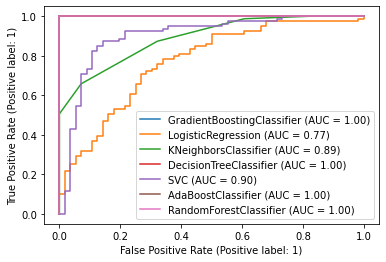

In [56]:
#For Training Data
disp = plot_roc_curve (gbr, x_train, y_train,)
plot_roc_curve (logreg, x_train, y_train, ax = disp.ax_)
plot_roc_curve (knn, x_train, y_train, ax = disp.ax_)
plot_roc_curve (dtc, x_train, y_train, ax = disp.ax_)
plot_roc_curve (svc, x_train, y_train, ax = disp.ax_)
plot_roc_curve (ada, x_train, y_train, ax = disp.ax_)
plot_roc_curve (RFC, x_train, y_train, ax = disp.ax_)

plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

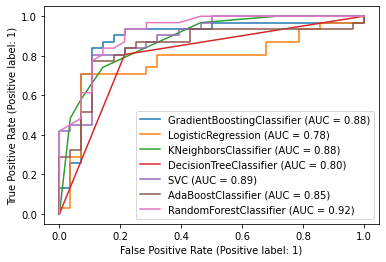

In [57]:
#For Testing Data
disp = plot_roc_curve (gbr, x_test, y_test)
plot_roc_curve (logreg, x_test, y_test, ax = disp.ax_)
plot_roc_curve (knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve (dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (ada, x_test, y_test, ax = disp.ax_)
plot_roc_curve (RFC, x_test, y_test, ax = disp.ax_)

plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

# <span style="color:green">Here we see that SVM has good AUC curve.

# Saving Model

In [60]:
import joblib
joblib.dump(svc,'Model to Predict Glass Type')

['Model to Predict Glass Type']

# Model Prediction

In [61]:
svm_model = joblib.load('Model to Predict Glass Type')
glass = svm_model.predict(x_test)
glass

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [62]:
test_data = np.array(y_test)
glass_type= pd.DataFrame({'predicted': glass,'original':test_data})
glass_type

,predicted,original
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,1,0
6,1,1
7,1,0
8,0,0
9,0,0


<span style="color:blue">End